In [14]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [2]:
from pyjop import *

....Initializing JOY OF PROGRAMMING Python process........ DONE


In [3]:
SimEnv.connect()

.

True

In [4]:
env = SimEnvManager.first()
arty = AirstrikeControl.first()
arty.hide_coordinates()

KeyboardInterrupt: 

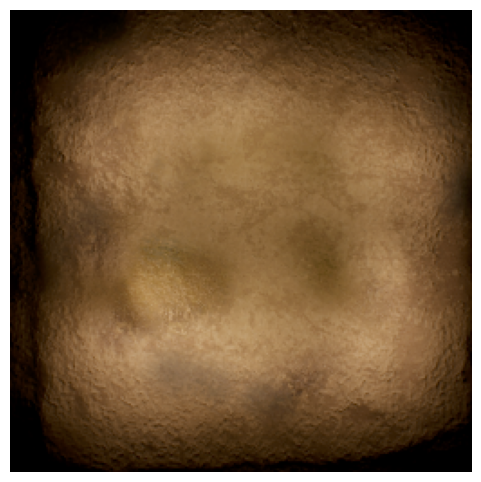

In [9]:
#Continous Streaming 
fig = plt.figure(figsize=(6, 6))
imgplot = plt.imshow(np.zeros((256, 256, 3), dtype=np.uint8))
plt.axis('off')
while True:
    img = Image.fromarray(arty.get_camera_frame())
    imgplot.set_data(img)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.5)

(-0.5, 255.5, 255.5, -0.5)

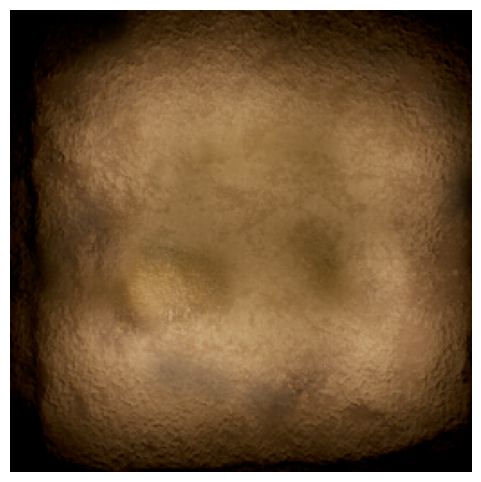

In [10]:
#Base Image As Reference
img_base = arty.get_camera_frame()
plt.figure(figsize=(6, 6))
plt.imshow(img_base)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

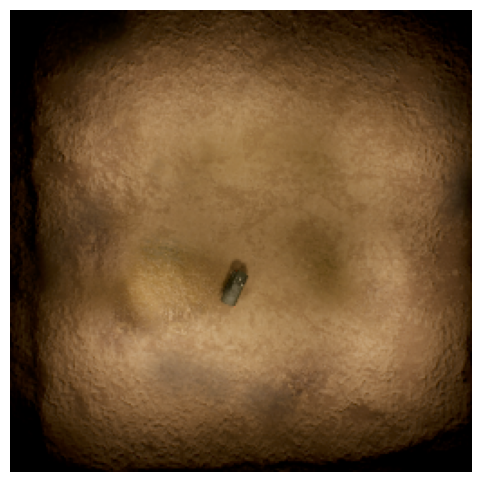

In [11]:
#Tank
img_tank = arty.get_camera_frame()
plt.figure(figsize=(6, 6))
plt.imshow(img_tank)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

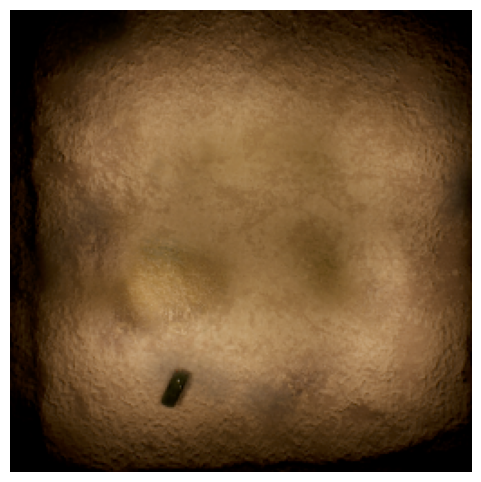

In [12]:
#Tank after some time
img_tank_aft = arty.get_camera_frame()
plt.figure(figsize=(6, 6))
plt.imshow(img_tank_aft)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

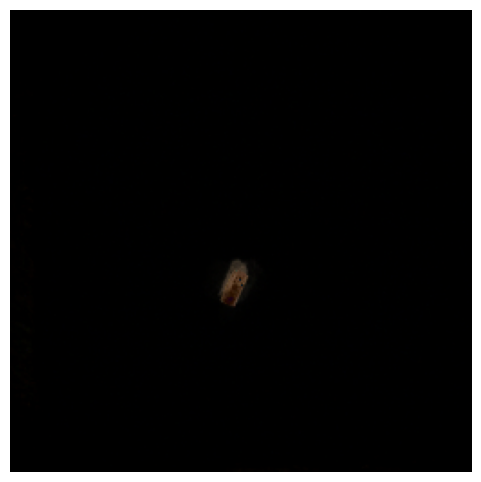

In [16]:
#first tank difference for position 
diff_tank = cv2.absdiff(img_base, img_tank)
plt.figure(figsize=(6, 6))
plt.imshow(diff_tank)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

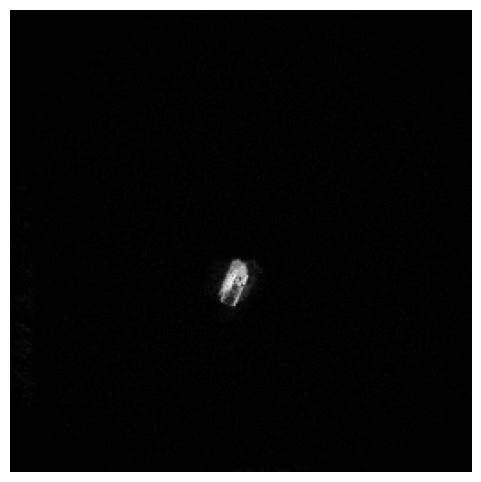

In [17]:
#Convert to grayscale
gray_image = cv2.cvtColor(diff_tank, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

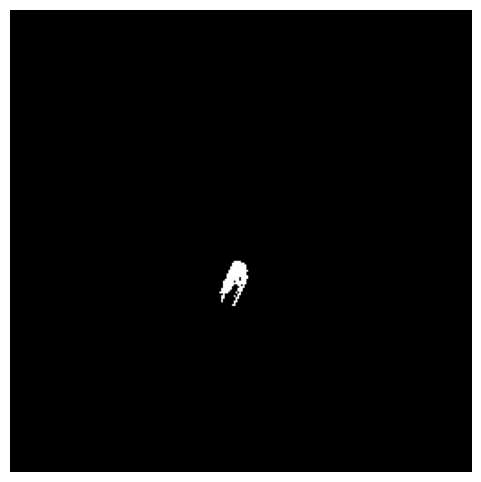

In [18]:
#Filter Out the noise
_, thresh = cv2.threshold(gray_image, 30, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

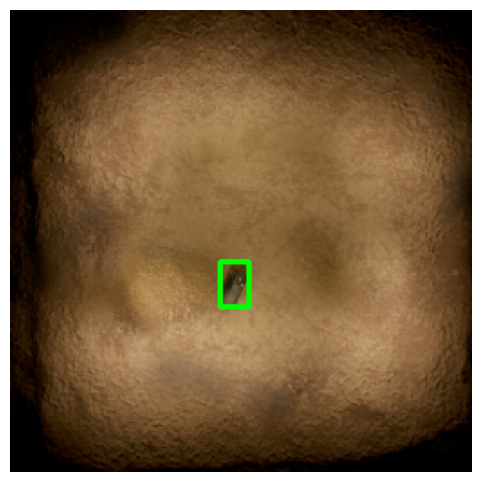

In [24]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity=8)
largest_component_index = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
x, y, width, height, area = stats[largest_component_index, :]
image_copy = img_tank.copy()
cv2.rectangle(image_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)
center_x = x + width // 2
center_y = y + height // 2
plt.figure(figsize=(6, 6))
plt.imshow(image_copy, cmap='gray')
plt.axis('off')

In [25]:
#Combine Into 1 Function
def get_center(img_base, img_target):
    diff_img = cv2.absdiff(img_base, img_target)
    gray_image = cv2.cvtColor(diff_img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_image, 30, 255, cv2.THRESH_BINARY)
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity=8)
    largest_component_index = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
    x, y, width, height, area = stats[largest_component_index, :]
    center_x = x + width // 2
    center_y = y + height // 2
    return center_x, center_y

In [26]:
get_center(img_base, img_tank)

(124, 151)

In [27]:
get_center(img_base, img_tank_aft)

(92, 210)

In [28]:
try: 
    get_center(img_base, img_base)
except ValueError as ve:
    pass

ValueError: attempt to get argmax of an empty sequence